# 2.3.1 Complex machine learning models - sklearn - random forest
# Top 3 - BASEL
### The following script contains the following:

#### 1. Import data libraries, additional requirements
#### 2. File directory, read the data
#### 3. Create subsets for top 3 weather stations
#### 4. Create dictionary lists for outcome labels
#### 5. Load and split data into training/test sets
#### 6. Create random forest classifier
#### 7. Conduct feature importances analysis
        - Basel
---------------------------------------------------------------------------------------------------------------------------
## 1. Import data libraries, additional requirements
---------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
# Auto-call show plots
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

---------------------------------------------------------------------------------------------------------------------------
## 2. File directory, read the data

In [3]:
path = r'climatewins-ml'

In [4]:
weather = pd.read_csv(os.path.join(path, '02 Data Sets', 'Unsupervised', 'weather-data-cleaned-date.csv'))
weather

BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
0                      7                    0.32            0.85   
1                      6                    0.36            0.84   
2                      8                    0.18            0.90   
3                      3                    0.58            0.92   
4                      6                    0.65            0.95   
...                  ...                     ...             ...   
22945                  1                    1.34            0.79   
22946                  6                    1.34            0.77   
22947                  4                    1.34            0.76   
22948                  5                    1.34            0.80   
22949                  5                    1.34            0.84   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
0                     0.09          1.0180             0.7            10.9   
1                     1.05          1.0180             1.1            10.1   
2                     0.30          1.0180             0.0             9.9   
3                     0.00          1.0180             4.1            10.6   
4                     0.14          1.0180             5.4             6.0   
...                    ...             ...             ...             ...   
22945                 0.22          1.0248             7.7            21.4   
22946                 0.22          1.0244             5.4            21.9   
22947                 0.22          1.0227             6.1            22.4   
22948                 0.22          1.0212             5.8            21.1   
22949                 0.22          1.0193             3.2            19.2   

       BASEL_temp_mean  BASEL_temp_min  BELGRADE_cloud_cover  \
0                  6.5             0.8                     1   
1                  6.1             3.3                     6   
2                  8.5             5.1                     6   
3                  6.3             3.8                     8   
4                  3.0            -0.7                     8   
...                ...             ...                   ...   
22945             15.9            11.4                     2   
22946             16.7            14.3                     0   
22947             16.7            13.1                     2   
22948             15.4            11.6                     1   
22949             13.5             9.9                     4   

       BELGRADE_global_radiation  BELGRADE_humidity  BELGRADE_precipitation  \
0                           0.88               0.81                    0.00   
1                           0.25               0.84                    0.00   
2                           0.67               0.77                    0.00   
3                           0.25               0.93                    0.00   
4                           0.25               0.99                    0.06   
...                          ...                ...                     ...   
22945                       1.57               0.68                    0.18   
22946                       1.57               0.68                    0.18   
22947                       1.57               0.68                    0.18   
22948                       1.57               0.68                    0.18   
22949                       1.57               0.68                    0.18   

       BELGRADE_pressure  BELGRADE_sunshine  BELGRADE_temp_max  \
0                 1.0195                7.0                7.9   
1                 1.0172                0.0                4.4   
2                 1.0179                3.5                6.4   
3                 1.0268                0.0                3.0   
4                 1.0286                0.0                2.8   
...                  ...                ...                ...   
22945             1.0278                5.7               24.4   
22946  

In [5]:
outcomes = pd.read_csv(os.path.join(path, '02 Data Sets', 'Unsupervised', 'outcomes-cleaned.csv'))
outcomes

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   
...                       ...                        ...   
22945                       0                          0   
22946                       0                          0   
22947                       0                          0   
22948                       0                          0   
22949                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0  

---------------------------------------------------------------------------------------------------------------------------
## 3. Create subsets for top 3 weather stations

In [6]:
# Get columns with the prefix 'BASEL_'
bas_cols = [col for col in weather.columns if col.startswith('BASEL_')]

# Create a subset DataFrame containing only the columns with the prefix 'BASEL_'
bas_sub = weather[bas_cols]

In [7]:
bas_sub

BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
0                      7                    0.32            0.85   
1                      6                    0.36            0.84   
2                      8                    0.18            0.90   
3                      3                    0.58            0.92   
4                      6                    0.65            0.95   
...                  ...                     ...             ...   
22945                  1                    1.34            0.79   
22946                  6                    1.34            0.77   
22947                  4                    1.34            0.76   
22948                  5                    1.34            0.80   
22949                  5                    1.34            0.84   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
0                     0.09          1.0180             0.7            10.9   
1                     1.05          1.0180             1.1            10.1   
2                     0.30          1.0180             0.0             9.9   
3                     0.00          1.0180             4.1            10.6   
4                     0.14          1.0180             5.4             6.0   
...                    ...             ...             ...             ...   
22945                 0.22          1.0248             7.7            21.4   
22946                 0.22          1.0244             5.4            21.9   
22947                 0.22          1.0227             6.1            22.4   
22948                 0.22          1.0212             5.8            21.1   
22949                 0.22          1.0193             3.2            19.2   

       BASEL_temp_mean  BASEL_temp_min  
0                  6.5             0.8  
1                  6.1             3.3  
2                  8.5             5.1  
3                  6.3             3.8  
4                  3.0            -0.7  
...                ...             ...  
22945             15.9            11.4  
22946             16.7            14.3  
22947             16.7            13.1  
22948             15.4            11.6  
22949             13.5             9.9  

[22950 rows x 9 columns]

In [8]:
# Export BASEL subset

bas_sub.to_csv(os.path.join(path, '02 Data Sets', 'Supervised', 'basel-subset.csv'), index=False)

In [9]:
# Get columns with the prefix 'BELGRADE_'
bel_cols = [col for col in weather.columns if col.startswith('BELGRADE_')]

# Create a subset DataFrame containing only the columns with the prefix 'BELGRADE_'
bel_sub = weather[bel_cols]

In [10]:
bel_sub

BELGRADE_cloud_cover  BELGRADE_global_radiation  BELGRADE_humidity  \
0                         1                       0.88               0.81   
1                         6                       0.25               0.84   
2                         6                       0.67               0.77   
3                         8                       0.25               0.93   
4                         8                       0.25               0.99   
...                     ...                        ...                ...   
22945                     2                       1.57               0.68   
22946                     0                       1.57               0.68   
22947                     2                       1.57               0.68   
22948                     1                       1.57               0.68   
22949                     4                       1.57               0.68   

       BELGRADE_precipitation  BELGRADE_pressure  BELGRADE_sunshine  \
0                        0.00             1.0195                7.0   
1                        0.00             1.0172                0.0   
2                        0.00             1.0179                3.5   
3                        0.00             1.0268                0.0   
4                        0.06             1.0286                0.0   
...                       ...                ...                ...   
22945                    0.18             1.0278                5.7   
22946                    0.18             1.0295                5.7   
22947                    0.18             1.0278                5.7   
22948                    0.18             1.0238                5.7   
22949                    0.18             1.0235                5.7   

       BELGRADE_temp_max  BELGRADE_temp_mean  BELGRADE_temp_min  
0                    7.9                 3.7               -0.9  
1                    4.4                 2.9                2.2  
2                    6.4                 3.1               -0.5  
3                    3.0                 2.0               -2.0  
4                    2.8                 2.0                0.7  
...                  ...                 ...                ...  
22945               24.4                18.2               12.1  
22946               21.2                15.9               10.6  
22947               18.2                13.4                8.6  
22948               20.9                15.0                9.1  
22949               18.4                14.4               10.4  

[22950 rows x 9 columns]

In [11]:
# Export BELGRADE subset

bel_sub.to_csv(os.path.join(path, '02 Data Sets', 'Supervised', 'belgrade-subset.csv'), index=False)

In [12]:
# Get columns with the prefix 'MADRID_'
mad_cols = [col for col in weather.columns if col.startswith('MADRID_')]

# Create a subset DataFrame containing only the columns with the prefix 'BASEL_'
mad_sub = weather[mad_cols]

In [13]:
mad_sub

MADRID_cloud_cover  MADRID_global_radiation  MADRID_humidity  \
0                       6                     0.53             0.92   
1                       7                     0.46             0.86   
2                       5                     0.63             0.90   
3                       0                     1.16             0.75   
4                       2                     1.10             0.64   
...                   ...                      ...              ...   
22945                   8                     1.89             0.52   
22946                   8                     1.89             0.51   
22947                   8                     1.89             0.46   
22948                   5                     1.89             0.66   
22949                   8                     1.89             0.82   

       MADRID_precipitation  MADRID_pressure  MADRID_sunshine  \
0                      0.00           1.0260              1.4   
1                      0.00           1.0254              0.9   
2                      0.00           1.0287              2.3   
3                      0.00           1.0281              8.7   
4                      0.00           1.0269              7.8   
...                     ...              ...              ...   
22945                  0.12           1.0204              5.3   
22946                  0.12           1.0221              3.9   
22947                  0.12           1.0186              8.1   
22948                  0.12           1.0186              3.1   
22949                  0.12           1.0188              0.0   

       MADRID_temp_max  MADRID_temp_mean  MADRID_temp_min  
0                 10.8               7.6              4.4  
1                 12.2               9.8              7.4  
2                 10.8               8.6              6.4  
3                 16.1              10.3              4.5  
4                 16.0              12.1              8.2  
...                ...               ...              ...  
22945             23.9              20.0             16.2  
22946             23.5              19.1             14.7  
22947             22.6              19.0             15.4  
22948             18.3              15.7             13.1  
22949             16.1              14.1             12.1  

[22950 rows x 9 columns]

In [14]:
# Export MADRID subset

mad_sub.to_csv(os.path.join(path, '02 Data Sets', 'Supervised', 'madrid-subset.csv'), index=False)

---------------------------------------------------------------------------------------------------------------------------
- Create subset for pleasant weather outcomes

In [15]:
bas_outcomes = outcomes['BASEL_pleasant_weather']
bas_outcomes

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: BASEL_pleasant_weather, Length: 22950, dtype: int64

In [16]:
# Export BASEL outcomes subset

bas_outcomes.to_csv(os.path.join(path, '02 Data Sets', 'Supervised', 'basel-outcomes-subset.csv'), index=False)

In [17]:
bel_outcomes = outcomes['BELGRADE_pleasant_weather']
bel_outcomes

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: BELGRADE_pleasant_weather, Length: 22950, dtype: int64

In [18]:
# Export BELGRADE outcomes subset

bel_outcomes.to_csv(os.path.join(path, '02 Data Sets', 'Supervised', 'belgrade-outcomes-subset.csv'), index=False)

In [19]:
mad_outcomes = outcomes['MADRID_pleasant_weather']
mad_outcomes

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: MADRID_pleasant_weather, Length: 22950, dtype: int64

In [20]:
# Export MADRID outcomes subset

mad_outcomes.to_csv(os.path.join(path, '02 Data Sets', 'Supervised', 'madrid-outcomes-subset.csv'), index=False)

---------------------------------------------------------------------------------------------------------------------------
## 4. Create dictionary lists for outcome labels

In [21]:
# Print the BASEL columns
bas_cols

['BASEL_cloud_cover',
 'BASEL_global_radiation',
 'BASEL_humidity',
 'BASEL_precipitation',
 'BASEL_pressure',
 'BASEL_sunshine',
 'BASEL_temp_max',
 'BASEL_temp_mean',
 'BASEL_temp_min']

In [24]:
# Create a dictionary to map binary labels to their corresponding categories
basel_labels = {0: 'Not Pleasant', 1: 'Pleasant'}

---------------------------------------------------------------------------------------------------------------------------
## 5. Load and split data into training/test sets

In [25]:
# Our data doesnt need to be reshaped

In [26]:
X = bas_sub

X.shape

(22950, 9)

In [27]:
y = bas_outcomes

y.shape

(22950,)

In [28]:
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [29]:
# Split the data into training and testing sets;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360,)
(4590, 9) (4590,)


In [31]:
# Reshape X_train
#X_train = X_train.values.reshape(-1, 15) #-1 means "whatever works"
#print(X_train.shape)
X_train

BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
12262                  7                    1.41            0.72   
9334                   2                    3.23            0.62   
7100                   5                    2.38            0.84   
12030                  8                    0.18            0.93   
2958                   6                    0.33            0.93   
...                  ...                     ...             ...   
11964                  8                    0.59            0.90   
21575                  6                    1.02            0.86   
5390                   6                    0.98            0.82   
860                    7                    2.26            0.70   
15795                  6                    1.22            0.68   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
12262                 0.00          1.0204             0.9            25.8   
9334                  0.00          1.0248            14.0            25.6   
7100                  1.08          1.0180             6.0            25.9   
12030                 0.80          1.0083             0.0             5.9   
2958                  0.22          1.0180             0.1             3.8   
...                    ...             ...             ...             ...   
11964                 0.05          1.0017             0.6            16.0   
21575                 0.08          1.0153             0.1             3.2   
5390                  0.00          1.0180             2.4            11.9   
860                   0.36          1.0180             5.6            15.7   
15795                 0.00          1.0195             2.7            15.8   

       BASEL_temp_mean  BASEL_temp_min  
12262             21.2            17.6  
9334              18.5            10.7  
7100              18.3            12.4  
12030              5.0             3.7  
2958               1.6             0.7  
...                ...             ...  
11964             13.3            12.1  
21575              1.0            -0.9  
5390               6.3             3.5  
860               10.1             8.2  
15795             11.6             5.1  

[18360 rows x 9 columns]

In [32]:
y_train

12262    0
9334     1
7100     0
12030    0
2958     0
        ..
11964    0
21575    0
5390     0
860      0
15795    0
Name: BASEL_pleasant_weather, Length: 18360, dtype: int64

In [33]:
print(X_test.shape)
X_test

(4590, 9)


BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
19955                  6                    1.14            0.68   
7729                   8                    0.25            0.75   
10815                  6                    1.94            0.73   
3125                   4                    2.60            0.66   
18985                  5                    0.23            0.80   
...                  ...                     ...             ...   
15982                  8                    0.25            0.89   
18660                  6                    0.78            0.75   
705                    7                    0.43            0.70   
12350                  8                    0.32            0.96   
8604                   4                    2.48            0.58   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
19955                 0.00          1.0168             4.1            19.5   
7729                  0.78          1.0130             0.0             2.6   
10815                 0.00          1.0122             3.7            25.0   
3125                  0.00          1.0180             8.1            21.9   
18985                 0.01          1.0297             0.1             9.1   
...                    ...             ...             ...             ...   
15982                 0.92          1.0085             0.0            14.9   
18660                 0.00          1.0329             3.7             0.6   
705                   0.01          1.0180             1.8             8.3   
12350                 0.17          1.0193             0.0             5.6   
8604                  1.85          1.0119             7.6            33.1   

       BASEL_temp_mean  BASEL_temp_min  
19955             15.1            10.8  
7729               1.2            -0.2  
10815             20.2            15.8  
3125              15.4             6.7  
18985              4.3             0.3  
...                ...             ...  
15982             12.8             9.8  
18660             -1.8            -3.6  
705                2.8             0.6  
12350              4.8             4.3  
8604              25.7            18.5  

[4590 rows x 9 columns]

In [34]:
print(y_test.shape)
y_test

(4590,)


19955    1
7729     0
10815    1
3125     1
18985    0
        ..
15982    0
18660    0
705      0
12350    0
8604     0
Name: BASEL_pleasant_weather, Length: 4590, dtype: int64

---------------------------------------------------------------------------------------------------------------------------
## 6. Create random forest classifier

In [35]:
# Creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


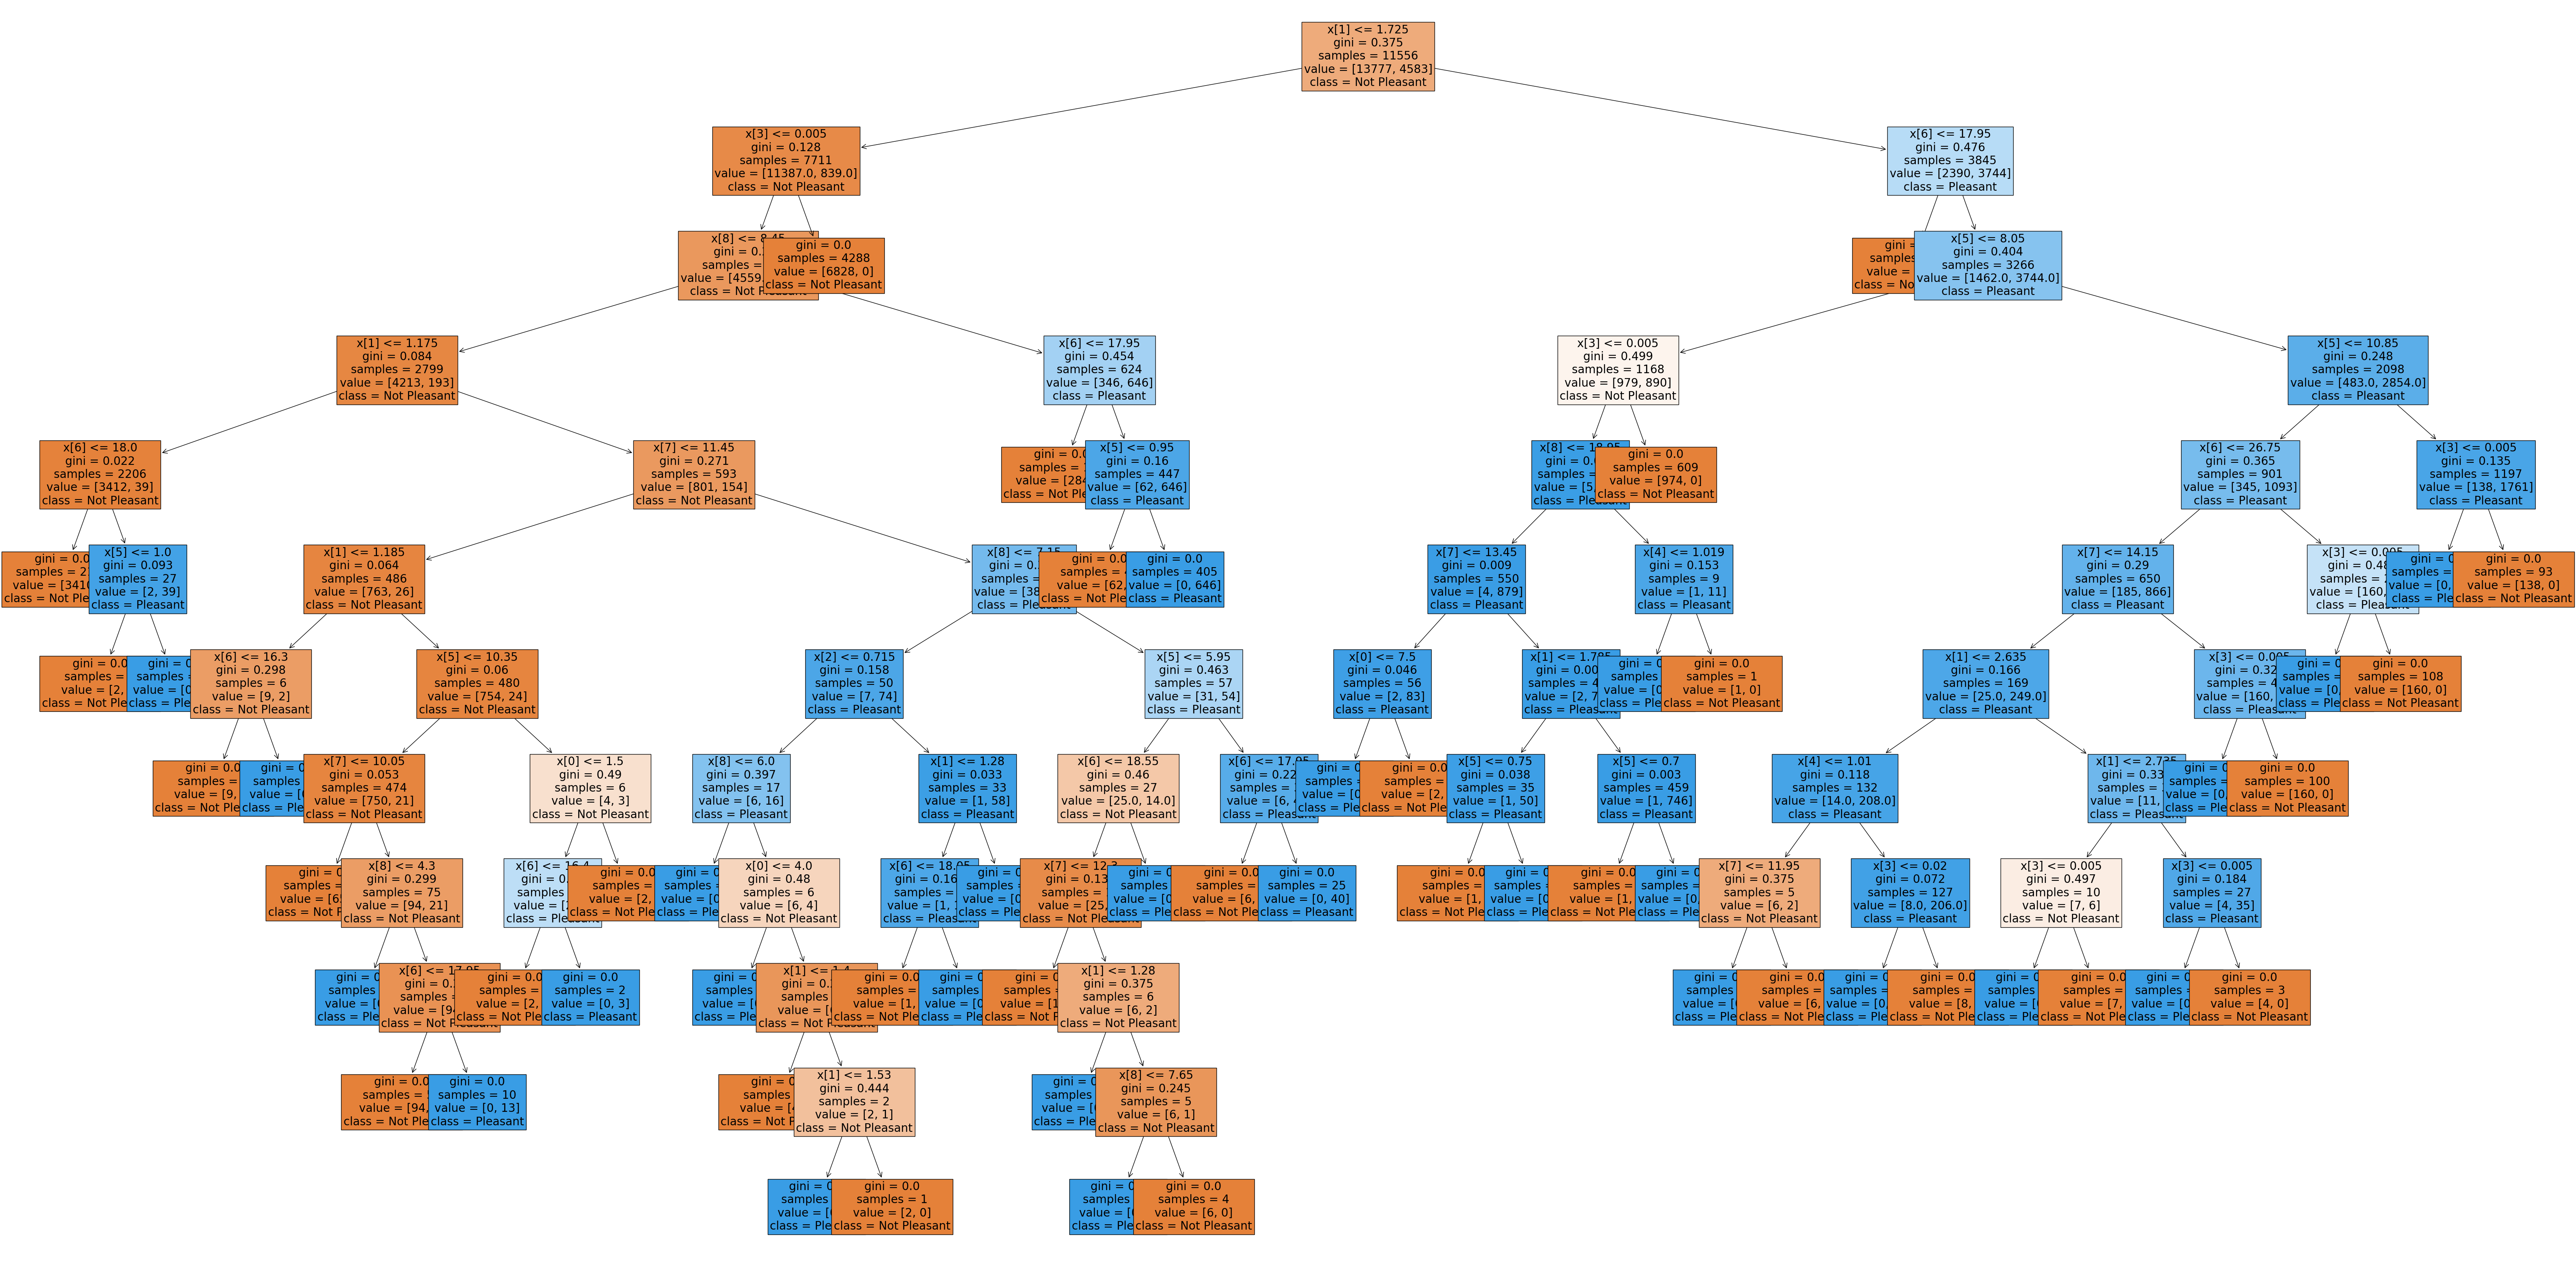

In [37]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=basel_labels, filled=True);#, feature_names = X.columns,class_names=['Not Pleasant', "Pleasant"],filled=True); max_depth = 4, 

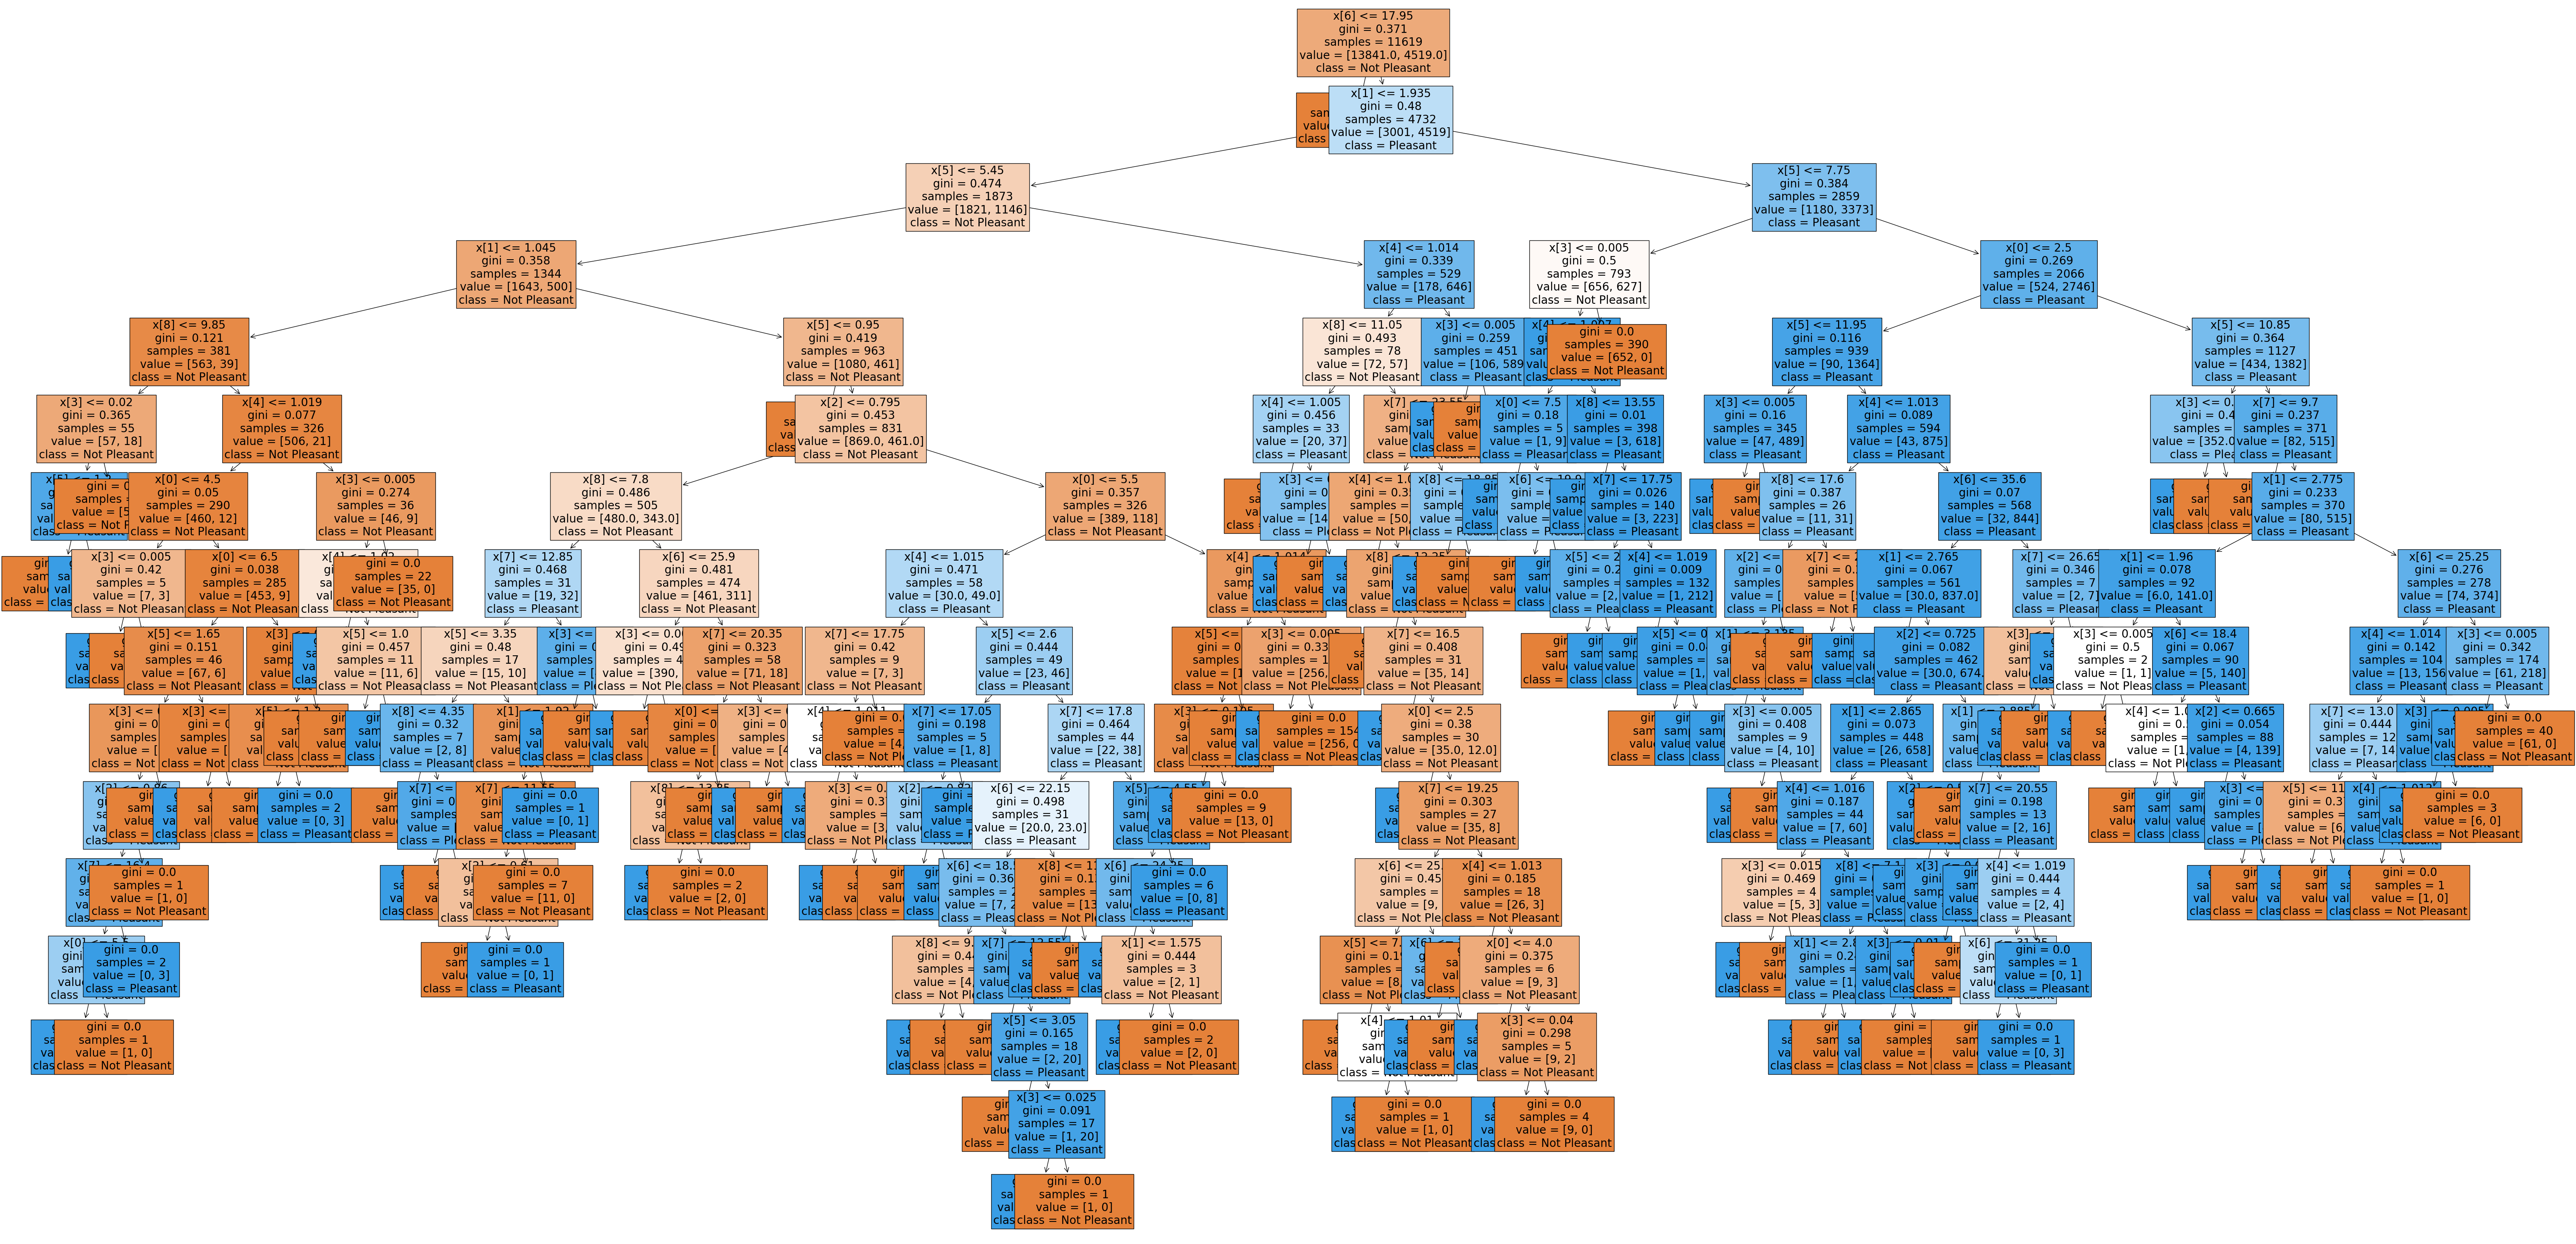

In [38]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, class_names=basel_labels, filled=True);

---------------------------------------------------------------------------------------------------------------------------
## 7. Conduct feature importances analysis
- Basel

In [39]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.02110149, 0.09401178, 0.00622324, 0.35107844, 0.00885139,
       0.11440569, 0.28973028, 0.08146563, 0.03313206])

In [40]:
np.set_printoptions(threshold=1000)

In [41]:
newarray = newarray.reshape(-1, 1, 9)
print(newarray.shape)
newarray

(1, 1, 9)


array([[[0.02110149, 0.09401178, 0.00622324, 0.35107844, 0.00885139,
         0.11440569, 0.28973028, 0.08146563, 0.03313206]]])

In [42]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.02110149, 0.09401178, 0.00622324, 0.35107844, 0.00885139,
       0.11440569, 0.28973028, 0.08146563, 0.03313206])

In [43]:
important = pd.Series(sumarray, index = bas_cols) #.sort_values(ascending = False)
important

BASEL_cloud_cover         0.021101
BASEL_global_radiation    0.094012
BASEL_humidity            0.006223
BASEL_precipitation       0.351078
BASEL_pressure            0.008851
BASEL_sunshine            0.114406
BASEL_temp_max            0.289730
BASEL_temp_mean           0.081466
BASEL_temp_min            0.033132
dtype: float64

['BASEL_cloud_cover', 'BASEL_global_radiation', 'BASEL_humidity', 'BASEL_precipitation', 'BASEL_pressure', 'BASEL_sunshine', 'BASEL_temp_max', 'BASEL_temp_mean', 'BASEL_temp_min']


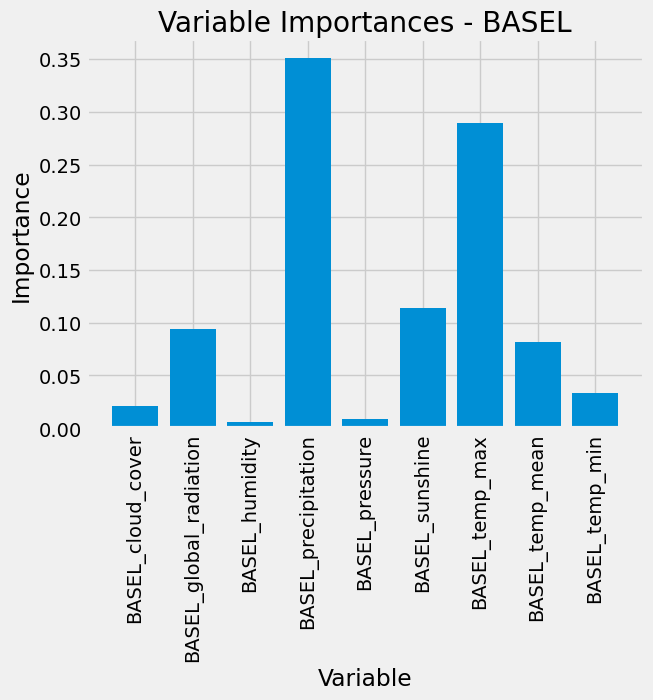

In [44]:
# Conduct variable importances by most influential weather station (feature specific analysis)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(bas_cols)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, bas_cols, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances - BASEL');

- **Notes:** Top features of importances are for BASEL weather station are:

        1. Precipitation
        2. Temperature max
        3. Global radiation

---------------------------------------------------------------------------------------------------------------------------